In [1]:
import pandas as pd
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import ColumnDataSource
# from bokeh.models.tools import HoverTool
# from bokeh.io import output_notebook
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import utils

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = utils.wu_weather()

In [3]:
pal = utils.pal()
pal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5513 entries, 2005-02-01 to 2020-03-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pal_min   5513 non-null   float64
 1   pal_max   5513 non-null   float64
 2   pal_mean  5513 non-null   float64
dtypes: float64(3)
memory usage: 172.3 KB


In [4]:
merged = df.merge(pal, left_index=True, right_index=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5514 entries, 2005-02-01 to 2020-03-30
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   t_max        5514 non-null   int64  
 1   t_avg        5514 non-null   float64
 2   t_min        5514 non-null   int64  
 3   dwpt_max     5514 non-null   int64  
 4   dwpt_avg     5514 non-null   float64
 5   dwpt_min     5514 non-null   int64  
 6   rh_max       5514 non-null   int64  
 7   rh_avg       5514 non-null   float64
 8   rh_min       5514 non-null   int64  
 9   ws_max       5514 non-null   int64  
 10  ws_avg       5514 non-null   float64
 11  ws_min       5514 non-null   int64  
 12  pr_max       5514 non-null   float64
 13  pr_avg       5514 non-null   float64
 14  pr_min       5514 non-null   float64
 15  prcp_total   5514 non-null   float64
 16  day_of_year  5514 non-null   int64  
 17  weekday      5514 non-null   int64  
 18  week         5514 non-null   i

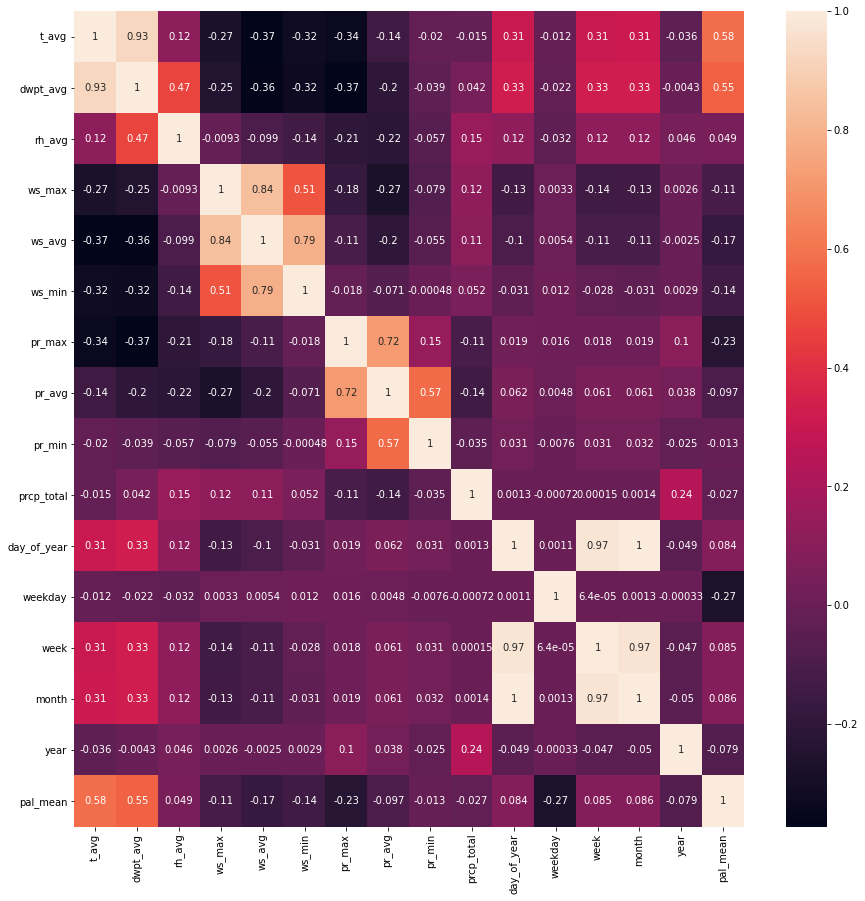

In [5]:
for_corr = merged.drop(['t_max', 't_min', 'dwpt_max', 'dwpt_min', 'rh_max', 'rh_min', 'pal_min', 'pal_max'], axis='columns')
corr = for_corr.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, ax=ax, annot=True)

Some interesting observations to be made:
- Wind has a low negative correlation with temperature. Could be wind chill or the low correlation with precipitation, meaning more rain ==> more storms.
- Temperature still seems to be our strongest predictor of load (pal_min/max/mean)
- Pressure seems to have a low negative correlation with temperature, but only the max pressure.

Ultimately, nothing shockingly new given our other datasets.